#### 2) Salary_hike -> Build a prediction model for Salary_hike

### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_data = pd.read_csv("Salary_Data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
salary_data.shape

(30, 2)

In [6]:
salary_data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
type(salary_data)

pandas.core.frame.DataFrame

In [8]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
salary_data[salary_data.duplicated()]

,YearsExperience,Salary


In [11]:
new_data = pd.DataFrame(salary_data)
new_data.set_axis(['yearsexp','salary'], axis='columns', inplace=True)
print(new_data.columns)  

Index(['yearsexp', 'salary'], dtype='object')


(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

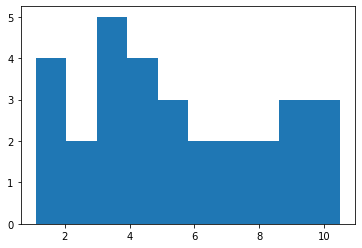

In [12]:
plt.hist(new_data.yearsexp)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

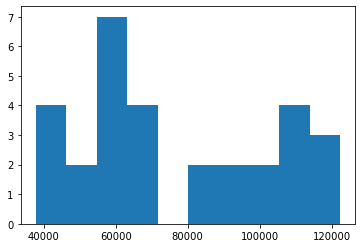

In [13]:
plt.hist(new_data.salary)

<AxesSubplot:xlabel='yearsexp', ylabel='Density'>

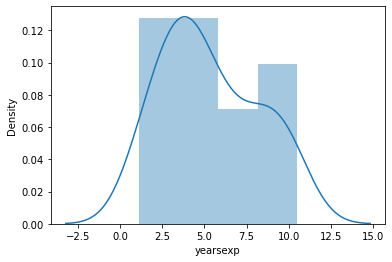

In [14]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(new_data.yearsexp)


<AxesSubplot:xlabel='salary', ylabel='Density'>

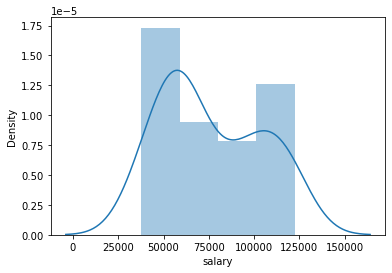

In [15]:
sns.distplot(new_data.salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb57df3970>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb57df3f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb57df36a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb57e034f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb57e037c0>],
 'means': []}

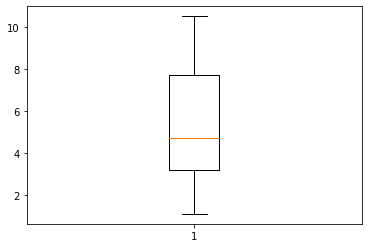

In [16]:
plt.boxplot(new_data.yearsexp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb57e5b580>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb57e5bb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb57e5b2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb57e69100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb57e693d0>],
 'means': []}

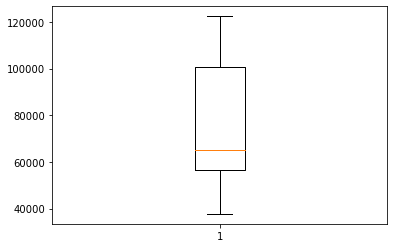

In [17]:
plt.boxplot(new_data.salary)

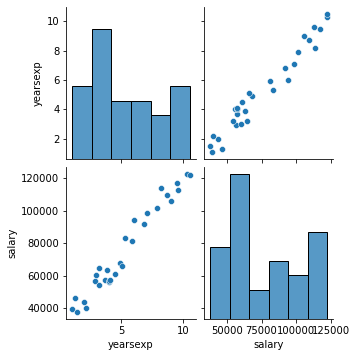

In [18]:
sns.pairplot(new_data)

In [19]:
new_data.corr()

,yearsexp,salary
yearsexp,1.000000,0.978242
salary,0.978242,1.000000


In [20]:
!pip install pandas_profiling
!pip install sweetviz

In [21]:
import pandas_profiling as pp 
import sweetviz as sv 

In [22]:
EDA_report = pp.ProfileReport(new_data)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
sweet_report = sv.analyze(new_data)
sweet_report.show_html("data.html")

                                             |                                             | [  0%]   00:00 ->…

Report data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Model 1

In [24]:
import statsmodels.formula.api as smf

In [25]:
model = smf.ols("salary~yearsexp",data = new_data).fit()

In [26]:
model.rsquared

0.9569566641435086

In [27]:
model.params

Intercept    25792.200199
yearsexp      9449.962321
dtype: float64

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        00:01:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
yearsexp    9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print(model.tvalues,"\n",model.pvalues)

Intercept    11.346940
yearsexp     24.950094
dtype: float64 
 Intercept    5.511950e-12
yearsexp     1.143068e-20
dtype: float64


<AxesSubplot:xlabel='yearsexp', ylabel='salary'>

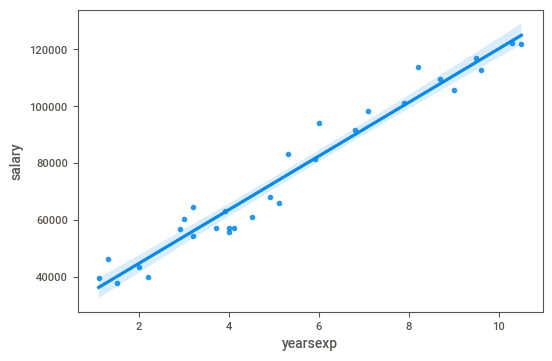

In [30]:
sns.regplot(x="yearsexp",y="salary",data=new_data)

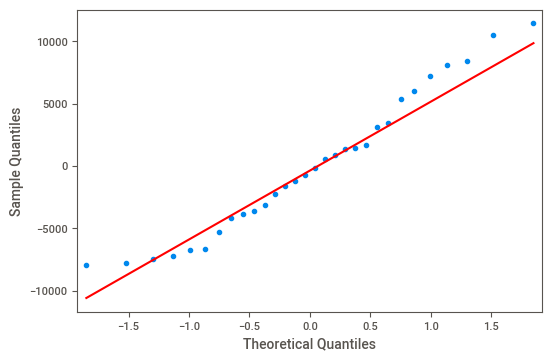

In [31]:
import statsmodels.api as sm 
qqplot = sm.qqplot(model.resid,line="q")

In [32]:
pred_data = pd.Series([5,10,15,3.5])
data_pred = pd.DataFrame(pred_data,columns=["yearsexp"])
model.predict(data_pred)

0     73042.011806
1    120291.823413
2    167541.635020
3     58867.068324
dtype: float64

In [33]:
pred = model.predict(new_data)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [34]:
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [35]:
rmse_lin = np.sqrt(np.mean((np.array(new_data['salary'])-np.array(pred))**2))
rmse_lin  

5592.043608760662

Text(0, 0.5, 'Salary')

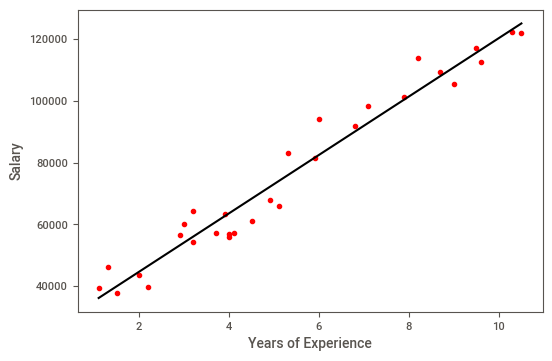

In [36]:
#import matplotlib.pylab as plt
plt.scatter(x=new_data['yearsexp'],y=new_data['salary'],color='red')
plt.plot(new_data['yearsexp'],pred,color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary') 

### Model2

In [37]:
model2 = smf.ols("salary ~ np.log(yearsexp)",data = new_data).fit()

In [38]:
model2.params

Intercept           14927.97177
np.log(yearsexp)    40581.98796
dtype: float64

In [39]:
model2.resid

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [40]:
model2.resid_pearson

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [41]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        00:01:38   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(yearsexp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
print(model2.tvalues,"\n",model2.pvalues)

Intercept            2.895135
np.log(yearsexp)    12.791989
dtype: float64 
 Intercept           7.268813e-03
np.log(yearsexp)    3.250155e-13
dtype: float64


In [43]:
model2.rsquared

0.8538888828756969

In [44]:
pred2 = model2.predict(new_data.yearsexp)

In [45]:
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [46]:
print(model2.conf_int(0.05))

                             0             1
Intercept          4365.921305  25490.022235
np.log(yearsexp)  34083.511736  47080.464184


In [47]:
rmse_lin2 = np.sqrt(np.mean((np.array(new_data.salary) - np.array(pred2))**2))
rmse_lin2

10302.893706228308

In [48]:
pred2.corr(new_data.salary)

0.9240610817882637

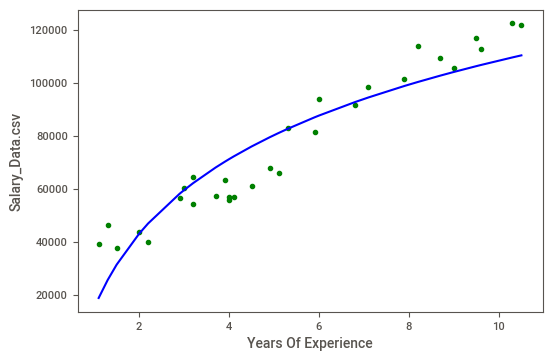

In [49]:
plt.scatter(x=new_data.yearsexp,y=new_data.salary,color="green")
plt.plot(new_data.yearsexp,pred2,color="blue")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary_Data.csv")
plt.show()

### Model3

In [50]:
model3 = smf.ols("np.log(salary) ~ yearsexp",data = new_data).fit()

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        00:01:39   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
yearsexp       0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model3.params

Intercept    10.507402
yearsexp      0.125453
dtype: float64

In [53]:
model3.resid

0    -0.065327
1     0.070353
2    -0.157344
3    -0.077217
4    -0.189492
5     0.073291
6     0.120836
7    -0.003905
8     0.164716
9    -0.017461
10    0.057676
11   -0.079792
12   -0.059162
13   -0.069532
14   -0.051493
15    0.004230
16   -0.049362
17    0.155353
18    0.059102
19    0.190292
20    0.066210
21    0.097387
22    0.027382
23    0.106188
24    0.004207
25   -0.069235
26   -0.029540
27   -0.079842
28   -0.084591
29   -0.113931
dtype: float64

In [54]:
model3.resid_pearson

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

In [55]:
pred_log = model3.predict(pd.DataFrame(new_data.yearsexp))
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [56]:
pred3 = np.exp(pred_log)
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [57]:
rmse_exp = np.sqrt(np.mean((np.array(new_data["salary"])-np.array(pred3))**2))
rmse_exp

7213.235076620129

In [58]:
pred3.corr(new_data.salary)

0.9660469705377085

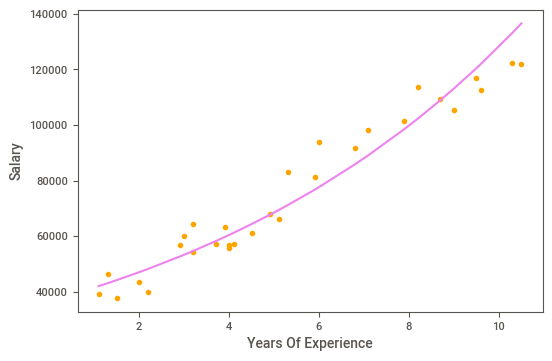

In [59]:
plt.scatter(x=new_data.yearsexp,y=new_data.salary,color="orange")
plt.plot(new_data.yearsexp,pred3,color="violet")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.show()

In [60]:
product_resid = model3.resid_pearson 
product_resid

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

Text(0, 0.5, 'Standardized Residual')

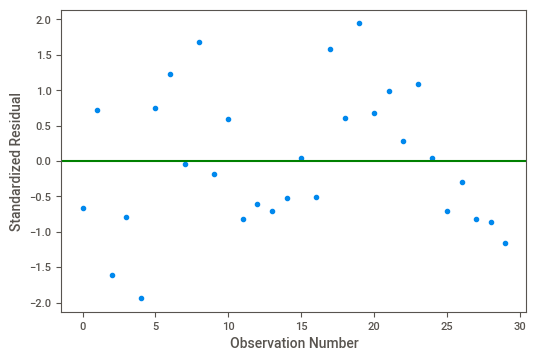

In [61]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

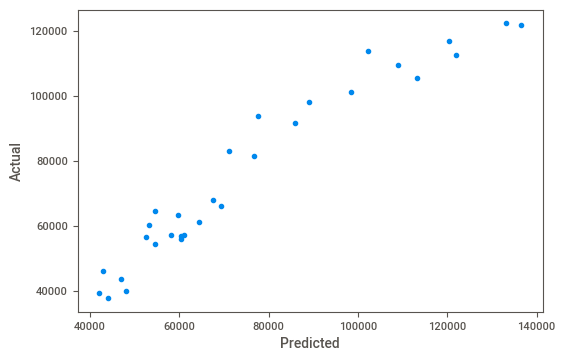

In [62]:
plt.scatter(x=pred3,y=new_data.salary)
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Model4

In [63]:
new_data["yearsexp_sq"] = new_data.yearsexp*new_data.yearsexp

In [64]:
new_data

,yearsexp,salary,yearsexp_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [65]:
model4 = smf.ols("np.log(salary)~yearsexp+yearsexp_sq",data=new_data).fit()
model4.params

Intercept      10.336852
yearsexp        0.202382
yearsexp_sq    -0.006614
dtype: float64

In [66]:
model4.resid

0     0.028604
1     0.152073
2    -0.087306
3    -0.034070
4    -0.156176
5     0.076368
6     0.120122
7    -0.011804
8     0.156817
9    -0.041007
10    0.028796
11   -0.111140
12   -0.090510
13   -0.103216
14   -0.093198
15   -0.043380
16   -0.099130
17    0.103956
18    0.005990
19    0.137358
20    0.019455
21    0.055132
22    0.002946
23    0.090617
24    0.006057
25   -0.055346
26    0.007059
27   -0.038304
28   -0.004776
29   -0.021989
dtype: float64

In [67]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           3.95e-18
Time:                        00:01:40   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.3369      0.067    154.368      0.000      10.199      10.474
yearsexp        0.2024      0.027      7.601      0.000       0.148       0.257
yearsexp_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
pred_quad = model4.predict(new_data)
pred4=np.exp(pred_quad)  # as we have used log(del_time) in preparing model so we need to convert it back
pred4

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [69]:
rmse_quad = np.sqrt(np.mean((np.array(new_data['salary'])-np.array(pred4))**2))
rmse_quad 

5391.081582693624

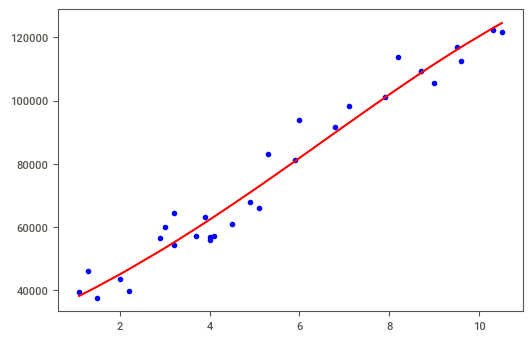

In [70]:
plt.scatter(new_data.yearsexp,new_data.salary,c="b")
plt.plot(new_data.yearsexp,pred4,"r")

Text(0, 0.5, 'Standardized Residual')

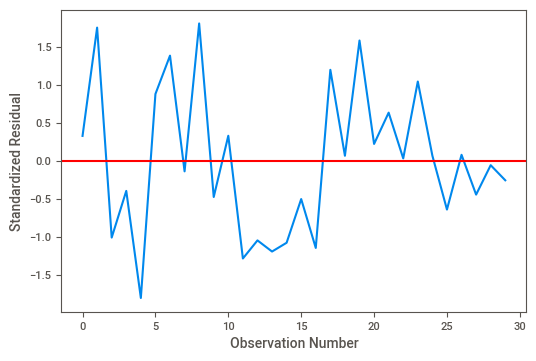

In [71]:
plt.plot(np.arange(30),model4.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")  

Text(0, 0.5, 'Standardized Residual')

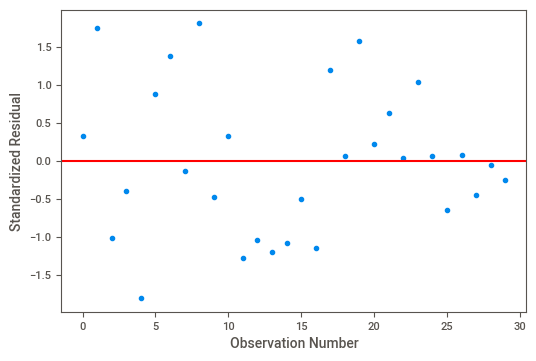

In [72]:
plt.scatter(np.arange(30),model4.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")